In [1]:
import numpy as np
import scipy.stats as sps
from glob import glob
import matplotlib.pyplot as plt
import uproot as ur
import ROOT as rt
import ROOT.RooFit as rf
from scipy.special import erf
import sys
sys.path.append('../lib')
from histo_utilities import create_TH1D, create_TH2D, std_color_list, SetMaxToMaxHist, make_ratio_plot
from cebefo_style import Set_2D_colz_graphics
# from particle import Particle

from analysis_utilities import drawOnCMSCanvas, extarct, extarct_multiple, createSel

import CMS_lumi, tdrstyle
tdrstyle.setTDRStyle()
CMS_lumi.writeExtraText = 1
CMS_lumi.extraText = "     Simulation Preliminary"

donotdelete = []

Welcome to JupyROOT 6.10/08


In [2]:
import operator
ops = {'>': operator.gt, '<': operator.lt, }

In [3]:
rt.gErrorIgnoreLevel = rt.kError
rt.RooMsgService.instance().setGlobalKillBelow(rt.RooFit.ERROR)

In [4]:
m_D0 = 1.86483 #1e-3*Particle.from_string('D0').mass
print m_D0
m_Dst = 2.01026 #1e-3*Particle.from_string('D*+').mass
print m_Dst
m_B0 = 5.27963 #1e-3*Particle.from_string('B0').mass
print m_B0
m_pi = 0.13957018 #1e-3*Particle.from_string('pi+').mass
print 'mD* - mD0 =', m_Dst - m_D0

1.86483
2.01026
5.27963
mD* - mD0 = 0.14543


In [5]:
cl = rt.TLine()
cl.SetLineColor(6)
cl.SetLineStyle(9)
cl.SetLineWidth(2)

In [6]:
directory = '../data/cmsMC_private/BPH_Tag-Mu_Probe-B0_KDmst-pD0bar-kp_13TeV-pythia8_Hardbbbar_PTFilter5_0p0-evtgen_SVS_PU0_10-2-3/jobs_B2DstK'
tMC = ur.open(directory + '/out_CAND_0.root')['outA']['Tevts']
print tMC.keys(), '\n\n'
branches = tMC.keys()
for b in np.sort(branches):
    pass
#     print b
    
branches = [
#             'LumiBlock', 
#             'MC_B_P', 
#             'MC_B_eta', 
#             'MC_B_phi',
#             'MC_B_pt', 
#             'MC_D0_P', 
#             'MC_D0_eta', 
#             'MC_D0_phi', 
#             'MC_D0_pt',
#             'MC_Dst_P', 
#             'MC_Dst_eta',
#             'MC_Dst_phi',
#             'MC_Dst_pt',
            'MC_Ks_P',
            'MC_Ks_eta',
            'MC_Ks_phi',
            'MC_Ks_pt',
#             'MC_pis_P',
#             'MC_pis_eta',
#             'MC_pis_phi',
#             'MC_pis_pt',
#             'Run',
#             'eventNumber',
            'n_B',
#             'n_D0',
            'n_Dst',
#             'n_K',
            'n_Ks',
#             'n_pi',
#             'n_pis',
#             'trgMu_charge',
#             'trgMu_eta',
#             'trgMu_phi',
#             'trgMu_pt',
            'B_E',
            'B_P',
            'B_eta',
            'B_phi',
            'B_pt',
            'B_pz',
#             'D0_E',
#             'D0_P',
#             'D0_eta',
#             'D0_phi',
#             'D0_pt',
#             'D0_pz',
            'Dst_E',
            'Dst_P',
            'Dst_eta',
            'Dst_phi',
            'Dst_pt',
            'Dst_pz',
#             'K_E',
#             'K_P',
#             'K_eta',
#             'K_phi',
#             'K_pt',
#             'K_pz',
            'Ks_E',
            'Ks_P',
            'Ks_eta',
            'Ks_phi',
            'Ks_pt',
            'Ks_pz',
#             'chi2_D0pis',
            'chi2_DstK',
#             'chi2_kpi',
#             'cos_D0pis_vtxMu',
            'cos_DstK_vtxBest',
#             'cos_kpi_vtxMu',
#             'd_vtxD0pis_vtxMu',
#             'd_vtxkpi_vtxMu',
#             'dca_D0pis_vtxMu',
#             'dca_kpi_vtxMu',
#             'mass_D0pis',
            'mass_DstK',
#             'mass_kpi',
#             'pi_E',
#             'pi_P',
#             'pi_eta',
#             'pi_phi',
#             'pi_pt',
#             'pi_pz',
#             'pis_E',
#             'pis_P',
#             'pis_eta',
#             'pis_phi',
#             'pis_pt',
#             'pis_pz',
#             'sigd_vtxD0pis_vtxMu',
#             'sigd_vtxkpi_vtxMu',
#             'sigdca_D0pis_vtxMu',
#             'sigdca_kpi_vtxMu'
]

['LumiBlock', 'MC_B_P', 'MC_B_eta', 'MC_B_phi', 'MC_B_pt', 'MC_D0_P', 'MC_D0_eta', 'MC_D0_phi', 'MC_D0_pt', 'MC_Dst_P', 'MC_Dst_eta', 'MC_Dst_phi', 'MC_Dst_pt', 'MC_Ks_P', 'MC_Ks_eta', 'MC_Ks_phi', 'MC_Ks_pt', 'MC_pis_P', 'MC_pis_eta', 'MC_pis_phi', 'MC_pis_pt', 'Run', 'eventNumber', 'n_B', 'n_D0', 'n_Dst', 'n_K', 'n_Ks', 'n_pi', 'n_pis', 'trgMu_charge', 'trgMu_eta', 'trgMu_phi', 'trgMu_pt', 'B_E', 'B_P', 'B_eta', 'B_phi', 'B_pt', 'B_pz', 'D0_E', 'D0_P', 'D0_eta', 'D0_phi', 'D0_pt', 'D0_pz', 'Dst_E', 'Dst_P', 'Dst_eta', 'Dst_phi', 'Dst_pt', 'Dst_pz', 'K_E', 'K_P', 'K_eta', 'K_phi', 'K_pt', 'K_pz', 'Ks_E', 'Ks_P', 'Ks_eta', 'Ks_phi', 'Ks_pt', 'Ks_pz', 'chi2_D0pis', 'chi2_DstK', 'chi2_kpi', 'cos_D0pis_vtxMu', 'cos_DstK_vtxBest', 'cos_kpi_vtxMu', 'd_vtxD0pis_vtxMu', 'd_vtxkpi_vtxMu', 'dca_D0pis_vtxMu', 'dca_kpi_vtxMu', 'mass_D0pis', 'mass_DstK', 'mass_kpi', 'pi_E', 'pi_P', 'pi_eta', 'pi_phi', 'pi_pt', 'pi_pz', 'pis_E', 'pis_P', 'pis_eta', 'pis_phi', 'pis_pt', 'pis_pz', 'sigd_vtxD0pis_vtxM

In [7]:
fn = directory + '/out*.root'
dMC = extarct_multiple(fn, branches=branches)
print 'Number of events:', dMC['n_B'].shape[0]
print 'Number of candidates:', dMC['mass_DstK'].shape[0]

Number of events: 15417
Number of candidates: 32198


In [8]:
fn = directory.replace('PU0', 'PU20') + '/out*.root'
dMC_PU = extarct_multiple(fn, branches=branches)
print 'Number of events:', dMC_PU['n_B'].shape[0]
print 'Number of candidates:', dMC_PU['mass_DstK'].shape[0]

Number of events: 12996
Number of candidates: 27206


# Cuts declaration

In [9]:
cut = {}
# cut['cos_DstK_vtxBest'] = ['>', 0.98]
# cut['chi2_D0pis'] = ['<', 3.84]
# cut['d_vtxkpi_vtxMu'] = ['>', 0.03]
# cut['sigdca_kpi_vtxMu'] = ['>', 2.]

In [10]:
print np.max(dMC['chi2_DstK'])
sps.chi2.cdf(np.max(dMC['chi2_DstK']), 1)

6.6348805


0.9899999098544793

In [11]:
sps.chi2.cdf(3.84, 1)

0.9499564787512949

In [12]:
def createSel(d, cut):
    sel = np.ones_like(d[cut.keys[0]], dtype=bool)
    for k, v in cut.iteritems():
        sel = np.logical_and(sel, ops[v[0]](d[k], v[1]) )
    return sel

## MC only

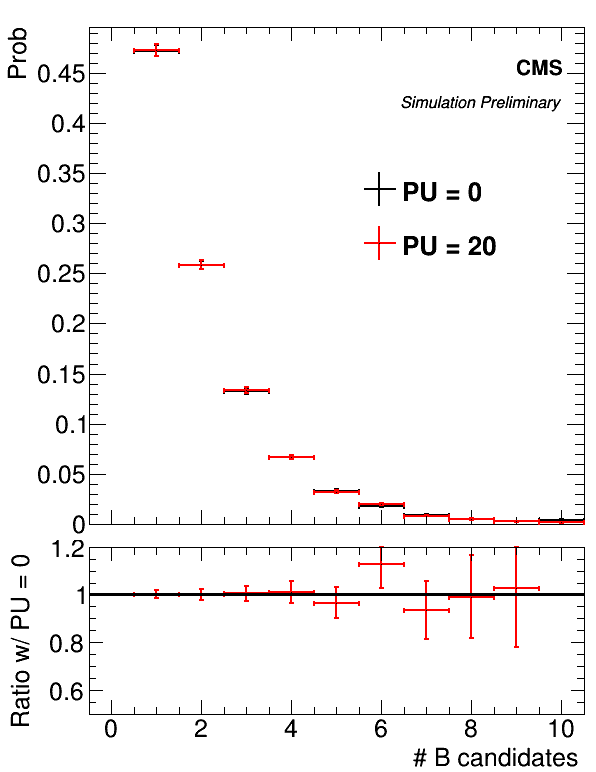

In [21]:
h = create_TH1D(dMC['n_B'], name='hPU0',
                title='PU = 0', 
                axis_title=['# B candidates', 'Prob'], 
                binning=[11,-0.5,10.5], 
                opt='overflow')
h.Sumw2()
h.Scale(1./h.Integral())

h_PU = create_TH1D(dMC_PU['n_B'], name='hPU20', title='PU = 20', binning=h.binning)
h_PU.Sumw2()
h_PU.Scale(1./h_PU.Integral())
h_PU.SetLineColor(2)

c = make_ratio_plot([h, h_PU], ratio_bounds=[0.5, 1.2])
CMS_lumi.CMS_lumi(c, -1, 33)
c.Draw()

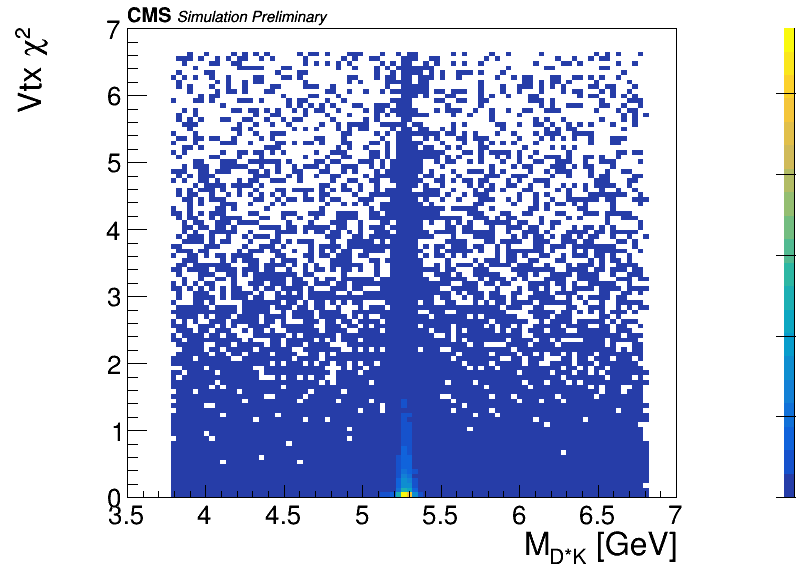

In [22]:
d = dMC
h = create_TH2D(np.column_stack((d['mass_DstK'], d['chi2_DstK'])), 
                axis_title=['M_{D*K} [GeV]', 'Vtx #chi^{2}', 'Candidates'],
                binning=[100, 3.5, 7, 100, 0, 7]
               )
c = drawOnCMSCanvas(CMS_lumi, [h], ['colz'])
c.SetRightMargin(0.15)
c.Draw()

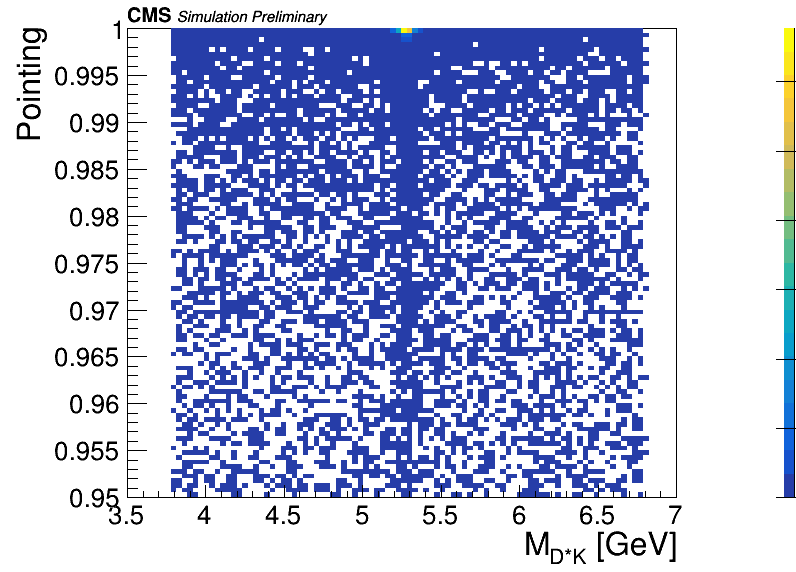

In [23]:
h = create_TH2D(np.column_stack((d['mass_DstK'], d['cos_DstK_vtxBest'])), 
                axis_title=['M_{D*K} [GeV]', 'Pointing', 'Candidates'],
                binning=[100, 3.5, 7, 100, 0.95, 1]
               )
c = drawOnCMSCanvas(CMS_lumi, [h], ['colz'])
c.SetRightMargin(0.15)
c.Draw()

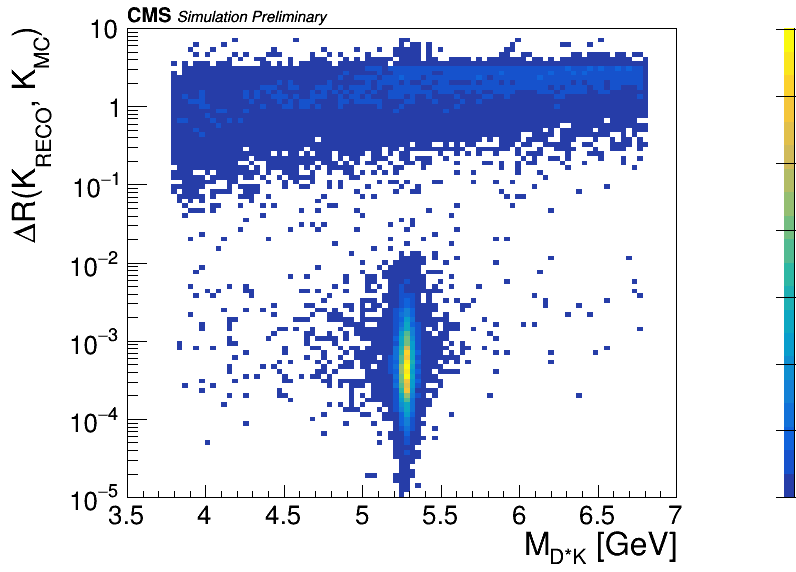

In [15]:
dphi = np.repeat(d['MC_Ks_phi'], d['n_B'].astype(np.int))-d['Ks_phi']
dphi = np.where(np.abs(dphi)>np.pi, dphi - np.sign(dphi)*2*np.pi, dphi)
deta = np.repeat(d['MC_Ks_eta'], d['n_B'].astype(np.int))-d['Ks_eta']
dR_Ks = np.hypot(deta, dphi)
h = create_TH2D(np.column_stack((d['mass_DstK'], dR_Ks)), 
                axis_title=['M_{D*K} [GeV]', '#DeltaR(K_{RECO}, K_{MC})', 'Candidates'],
                binning=[np.linspace(3.5, 7, 100), np.logspace(-5, 1, 100)]
               )
c = drawOnCMSCanvas(CMS_lumi, [h], ['colz'])
c.SetRightMargin(0.15)
c.Draw()
c.SetLogy()

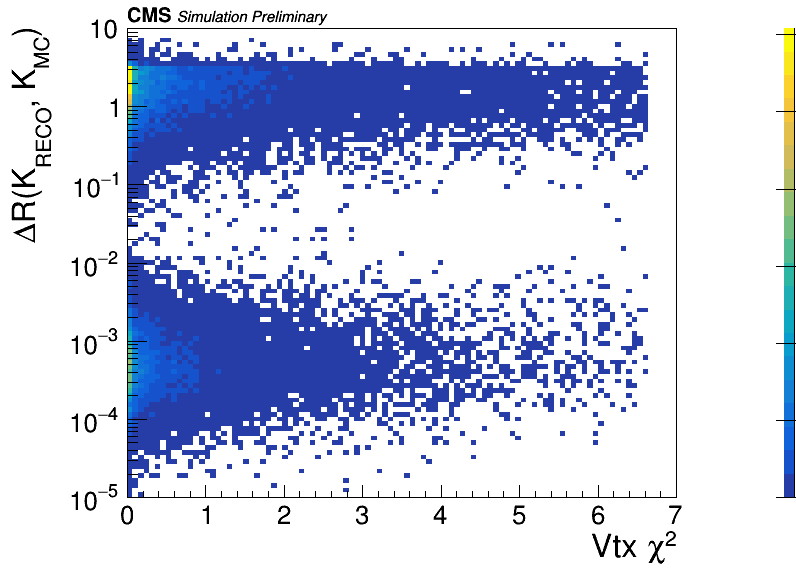

In [24]:
h = create_TH2D(np.column_stack((d['chi2_DstK'], dR_Ks)), 
                axis_title=['Vtx #chi^{2}', '#DeltaR(K_{RECO}, K_{MC})', 'Candidates'],
                binning=[np.linspace(0, 7, 100), np.logspace(-5, 1, 100)]
               )
c = drawOnCMSCanvas(CMS_lumi, [h], ['colz'])
c.SetRightMargin(0.15)
c.Draw()
c.SetLogy()

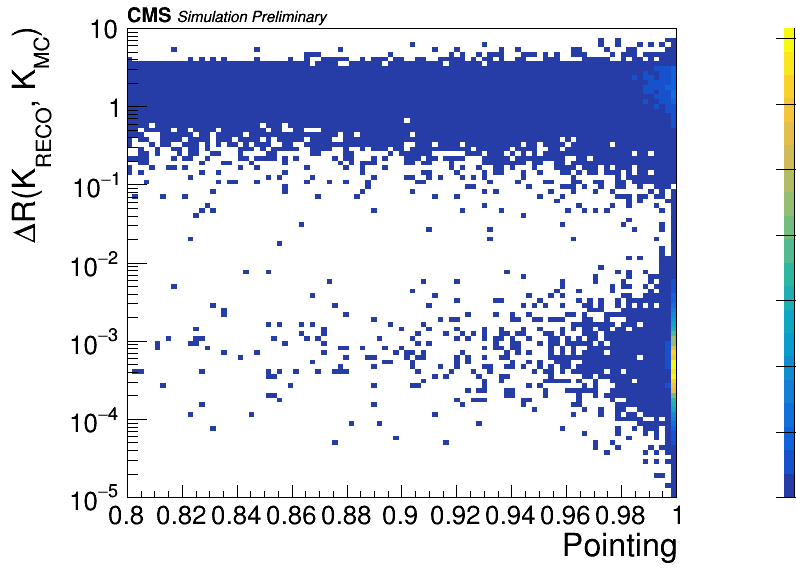

In [25]:
h = create_TH2D(np.column_stack((d['cos_DstK_vtxBest'], dR_Ks)), 
                axis_title=['Pointing', '#DeltaR(K_{RECO}, K_{MC})', 'Candidates'],
                binning=[np.linspace(0.8, 1, 100), np.logspace(-5, 1, 100)]
               )
c = drawOnCMSCanvas(CMS_lumi, [h], ['colz'])
c.SetRightMargin(0.15)
c.Draw()
c.SetLogy()

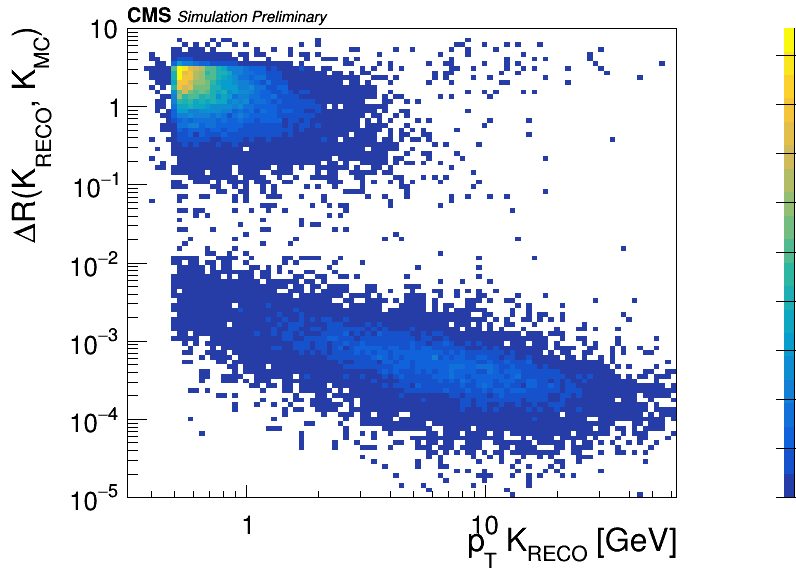

In [16]:
h = create_TH2D(np.column_stack((d['Ks_pt'], dR_Ks)), 
                axis_title=['p_{T} K_{RECO} [GeV]', '#DeltaR(K_{RECO}, K_{MC})', 'Candidates'],
                binning=[np.logspace(-0.5, 1.8, 100), np.logspace(-5, 1, 100)]
               )
c = drawOnCMSCanvas(CMS_lumi, [h], ['colz'])
c.SetRightMargin(0.15)
c.Draw()
c.SetLogy()
c.SetLogx()

In [17]:
print np.sum(dR_Ks<0.02)
print np.sum(d['n_B'] == 1)

13894
7285


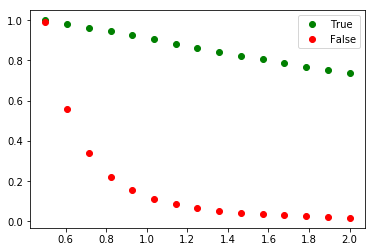

In [20]:
eff_true = []
eff_false = []
pt_cuts = np.linspace(0.5, 2, 15)
for pt_cut in np.linspace(0.5, 3, 15):
    sel_true = np.logical_and(dR_Ks<0.02, d['Ks_pt']>pt_cut)
    sel_false = np.logical_and(dR_Ks>0.02, d['Ks_pt']>pt_cut)
    e_true = np.sum(sel_true)/float(np.sum(dR_Ks<0.02))
    eff_true.append(e_true)
    e_false = np.sum(sel_false)/float(np.sum(dR_Ks>0.02))
    eff_false.append(e_false)
    
plt.plot(pt_cuts, eff_true, 'og', label='True')
plt.plot(pt_cuts, eff_false, 'or', label='False')
plt.legend(loc='best')